<a target="_blank" href="https://colab.research.google.com/drive/1oqGzVer_XTWOJq88tpcPyQ0B72l38YUL?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🕷️ Extract Keyboard prices with llama-index and ScrapegraphAI APIs

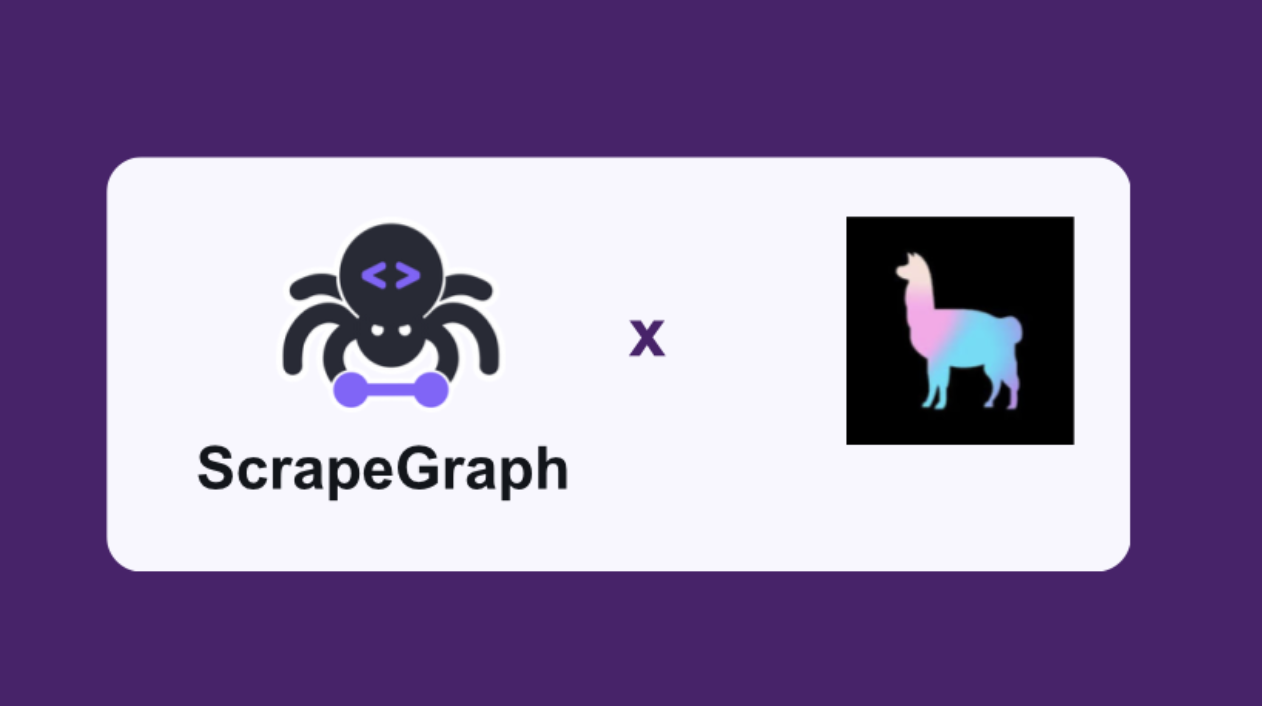

### 🔧 Install `dependencies`

In [ ]:
%%capture
!pip install llama-index
!pip install llama-index-tools-scrapegraphai

### 🔑 Import `ScrapeGraph` and `OpenaAI` API keys

You can find the Scrapegraph API key [here](https://dashboard.scrapegraphai.com/)

In [ ]:
import os
from getpass import getpass

# Check if the API key is already set in the environment
sgai_api_key = os.getenv("SGAI_API_KEY")

if sgai_api_key:
    print("SGAI_API_KEY found in environment.")
else:
    print("SGAI_API_KEY not found in environment.")
    # Prompt the user to input the API key securely (hidden input)
    sgai_api_key = getpass("Please enter your SGAI_API_KEY: ").strip()
    if sgai_api_key:
        # Set the API key in the environment
        os.environ["SGAI_API_KEY"] = sgai_api_key
        print("SGAI_API_KEY has been set in the environment.")
    else:
        print("No API key entered. Please set the API key to continue.")


SGAI_API_KEY found in environment.


You can find OpenAI key [here](https://auth.openai.com/authorize?audience=https%3A%2F%2Fapi.openai.com%2Fv1&auth0Client=eyJuYW1lIjoiYXV0aDAtc3BhLWpzIiwidmVyc2lvbiI6IjEuMjEuMCJ9&client_id=DRivsnm2Mu42T3KOpqdtwB3NYviHYzwD&device_id=ae0f442e-634e-48c9-97c1-586c458be4a9&issuer=https%3A%2F%2Fauth.openai.com&max_age=0&nonce=VXEuaDZsWUNQNHIyUDJ2N2k1TExpREUuWlg0R29YUmk5elUxYVU3QUpiNQ%3D%3D&redirect_uri=https%3A%2F%2Fplatform.openai.com%2Fauth%2Fcallback&response_mode=query&response_type=code&scope=openid+profile+email+offline_access&state=WGNmdGRub21STEtUcUMzRWRkYkFFbWI1VEJ6VkczYzBMdndBXzlnN05SZg%3D%3D&flow=treatment)

In [ ]:
import os
from getpass import getpass

# Check if the API key is already set in the environment
sgai_api_key = os.getenv("OPENAI_API_KEY")

if sgai_api_key:
    print("OPENAI_API_KEY found in environment.")
else:
    print("OPENAI_API_KEY not found in environment.")
    # Prompt the user to input the API key securely (hidden input)
    sgai_api_key = getpass("Please enter your OPENAI_API_KEY: ").strip()
    if sgai_api_key:
        # Set the API key in the environment
        os.environ["OPENAI_API_KEY"] = sgai_api_key
        print("OPENAI_API_KEY has been set in the environment.")
    else:
        print("No API key entered. Please set the API key to continue.")


OPENAI_API_KEY found in environment.


# Etract structured informations from a website

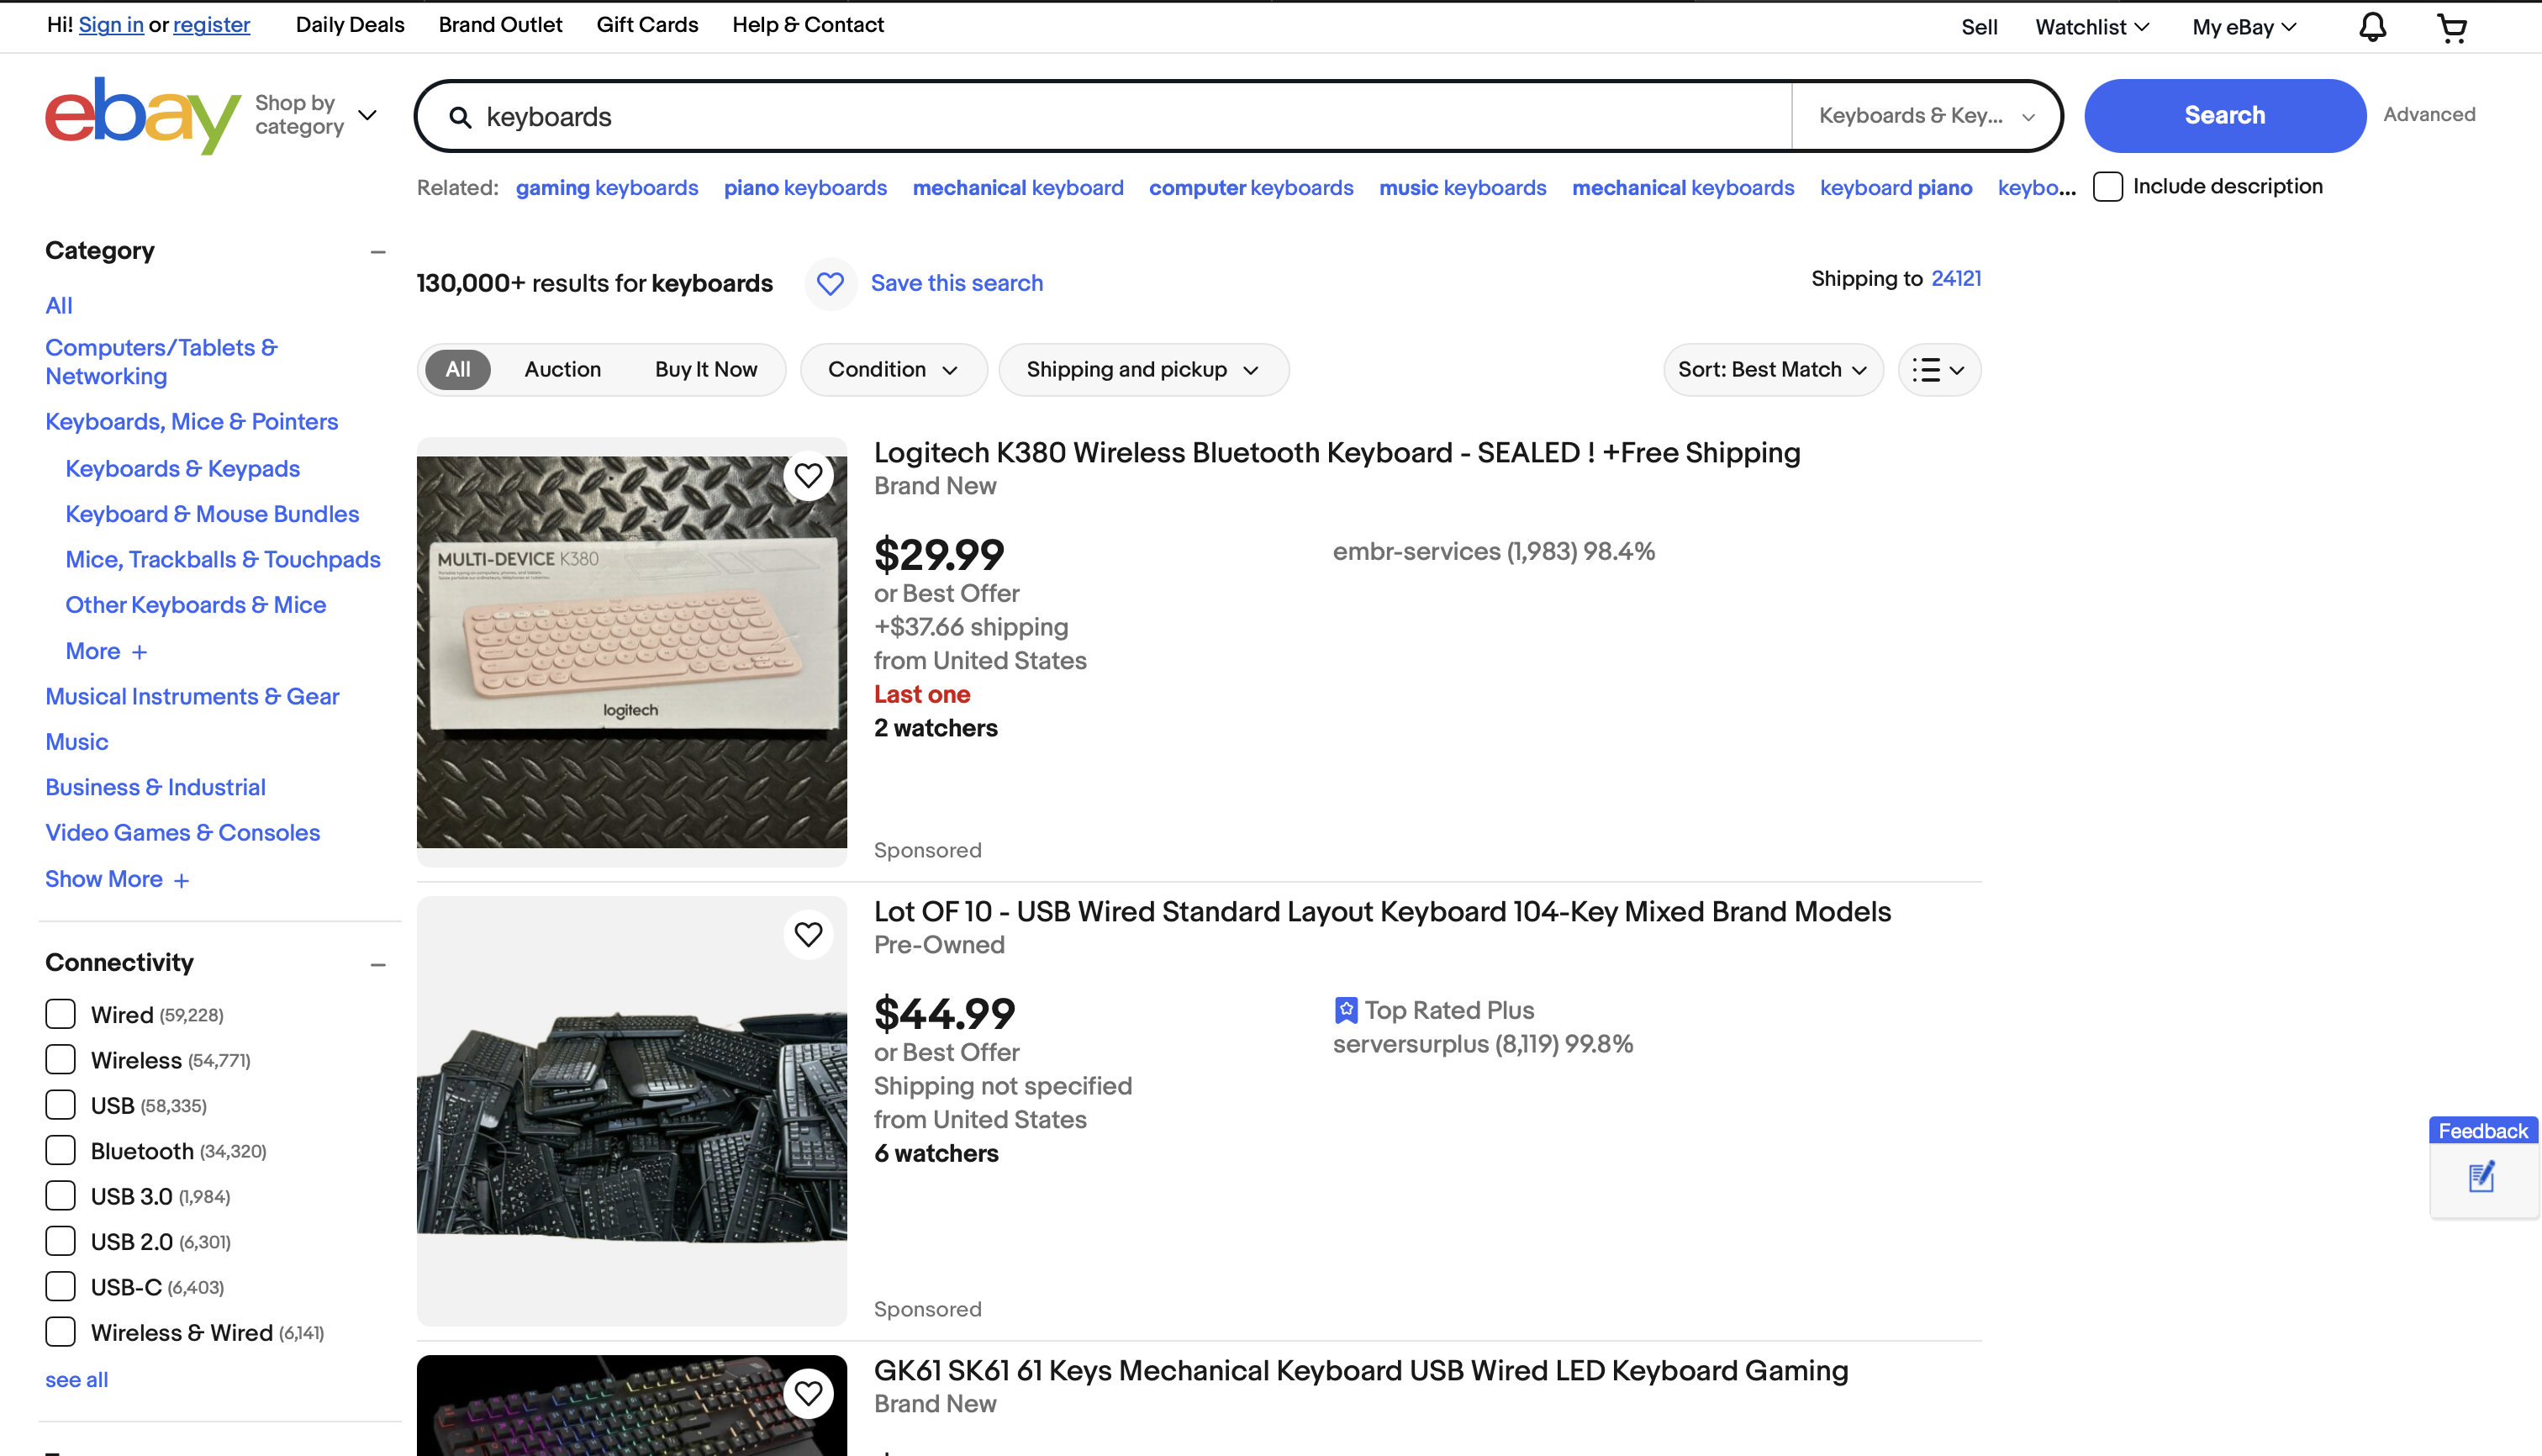

In [ ]:
def scrapegraph_tool_invocation(prompt, url):
    """
    Invokes the Scrapegraph smart scraper tool to extract information from a webpage based on a prompt.

    Args:
        prompt (str): The prompt describing what information to extract from the webpage.
        url (str): The URL of the webpage to scrape.

    Returns:
        The response from the Scrapegraph tool containing the extracted information.

    Note:
        Requires the SGAI_API_KEY environment variable to be set.
    """
    import os
    from llama_index.tools.scrapegraph.base import ScrapegraphToolSpec

    scrapegraph_tool = ScrapegraphToolSpec()
    response = scrapegraph_tool.scrapegraph_smartscraper(

        prompt=prompt,
        url=url,
        api_key=os.getenv("SGAI_API_KEY"),
    )

    return response

In [ ]:
from llama_index.core.tools import FunctionTool
from llama_index.llms.openai import OpenAI
from llama_index.core.agent import ReActAgent


scrape_tool = FunctionTool.from_defaults(fn=scrapegraph_tool_invocation)

# initialize llm
llm = OpenAI(model="gpt-4o")

# initialize ReAct agent
agent = ReActAgent.from_tools([scrape_tool ], llm=llm, verbose=True)

In [ ]:
link = "https://www.ebay.com/sch/i.html?_from=R40&_trksid=p4432023.m570.l1313&_nkw=keyboards&_sacat=0"

In [ ]:
res = agent.chat(f"Extract me all the keyboard names and prices from the following website: {link}")

> Running step 4abd0d38-1ec8-49dd-b5e3-7eb63e4de6eb. Step input: Extract me all the keyboard names and prices from the following website: https://www.ebay.com/sch/i.html?_from=R40&_trksid=p4432023.m570.l1313&_nkw=keyboards&_sacat=0
Thought: The current language of the user is English. I need to use a tool to help me extract all the keyboard names and prices from the provided eBay URL.
Action: scrapegraph_tool_invocation
Action Input: {'prompt': 'Extract all keyboard names and their prices.', 'url': 'https://www.ebay.com/sch/i.html?_from=R40&_trksid=p4432023.m570.l1313&_nkw=keyboards&_sacat=0'}
Observation: {'request_id': '1e9e81c6-5aa7-4816-8846-2d74eae8579a', 'status': 'completed', 'website_url': 'https://www.ebay.com/sch/i.html?_from=R40&_trksid=p4432023.m570.l1313&_nkw=keyboards&_sacat=0', 'user_prompt': 'Extract all keyboard names and their prices.', 'result': {'keyboards': [{'name': 'Logitech K380 Wireless Bluetooth Keyboard', 'price': '$29.99'}, {'name': 'Lot OF 10 - USB Wired St

### Print the result

In [ ]:
print(res)

Here are all the keyboard names and their prices extracted from the eBay website:

1. Logitech K380 Wireless Bluetooth Keyboard - $29.99
2. Lot OF 10 - USB Wired Standard Layout Keyboard 104-Key Mixed Brand Models - $44.99
3. EliteForce Gaming Keyboard LED Rainbow Backlit Light up Membrane Keyboard - $13.59
4. MADLIONS MAD 60/68HE Gaming Magnetic Switch Keyboard Wired Key Web Drive Custom - $59.45 to $117.63
5. HP 125 Wired Keyboard US, Black - $11.99
6. Mini Wireless Keyboard Bluetooth Compatible For Phone Tablet Color Backlit - $8.45
7. K1000 10 inch Ultra Thin 78 Keys Wired Keyboard Mini USB Slim PC Keyboard Keypad - $11.11
8. Razer BlackWidow V4 Wired Mechanical Green Switch Gaming Keyboard w/ Chroma RGB - $89.99
9. SteelSeries Apex Gaming Keyboard German 5 Zone RGB LED Backlit Low Profile 64148 - $71.20
10. Logitech Wave Keys MK670 Combo Keyboard with Mouse - $35.95
11. Razer BlackWidow V4 Pro 75% Wireless Gaming Keyboard - $224.99
12. Logitech Casa Pop-Up Desk Work From Home Kit 

## 🔗 Resources


<p align="left">
  <img src="https://raw.githubusercontent.com/VinciGit00/Scrapegraph-ai/main/docs/assets/api-banner.png"
       alt="ScrapeGraph API Banner" width="600">
</p>


- 🚀 **Get your API Key:** [ScrapeGraphAI Dashboard](https://dashboard.scrapegraphai.com)  
- 🐙 **GitHub:** [ScrapeGraphAI GitHub](https://github.com/scrapegraphai)  
- 💼 **LinkedIn:** [ScrapeGraphAI LinkedIn](https://www.linkedin.com/company/scrapegraphai/)  
- 🐦 **Twitter:** [ScrapeGraphAI Twitter](https://twitter.com/scrapegraphai)  
- 💬 **Discord:** [Join our Discord Community](https://discord.gg/uJN7TYcpNa)  
- 🦙 **LlamaIndex:** [ScrapeGraph docs](https://docs.llamaindex.ai/en/stable/api_reference/tools/scrapegraph/)

Made with ❤️ by the [ScrapeGraphAI](https://scrapegraphai.com) Team  
